# Graphing
This notebook illustrates the different types of graph you can produce with Hydrofunctions.
We have:
* hydrograph
* flow duration
* histogram

In [1]:
# Prep
import hydrofunctions as hf
%matplotlib inline
hf.__version__

'0.1.6'

In [2]:
# Data Prep for Two Stream Gauges
sites = ['01634000', '01632000']  # Both gauges are along the Shenandoah River; the first is downstream of the second.
start = '2005-01-01'
end = '2010-01-01'
service = 'dv'
# Request our data.
request = hf.NWIS(sites, service, start, end).get_data()
request.ok # Verify that the data request went fine.

True

In [3]:
# Clean up the dataframe
Q = request.df()
Q = Q.iloc[:,[0,2]]
Q.columns

Index(['USGS:01632000:00060:00003', 'USGS:01634000:00060:00003'], dtype='object')

In [4]:
# Rename the columns to something easier to remember
Q.rename(index=str, columns={"USGS:01632000:00060:00003": "Upstream", "USGS:01634000:00060:00003": "Downstream"}, inplace=True)
Q.head()

,Upstream,Downstream
2005-01-01 00:00:00,127.0,657.0
2005-01-02 00:00:00,116.0,638.0
2005-01-03 00:00:00,107.0,596.0
2005-01-04 00:00:00,102.0,580.0
2005-01-05 00:00:00,99.9,580.0


# Plotting a Hydrograph
Hydrographs can be produced simply by using the built-in .plot() method of our dataframe.

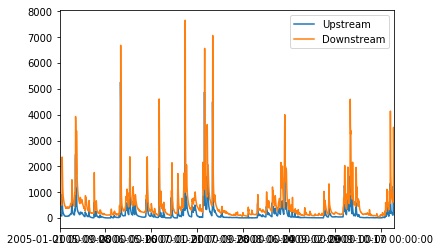

In [5]:
Q.plot()

# Plotting a Flow Duration Chart
Flow duration charts are function included in Hydrofunctions.
We'll use the 'linear' option to scale the X axis.

(<matplotlib.figure.Figure at 0x14f355134a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14f353d84e0>)

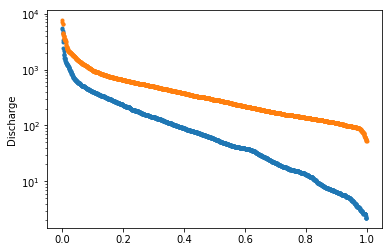

In [6]:
hf.flow_duration(Q, xscale='linear')

# Plotting a histogram
Dataframes have a built-in histogram function.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014F35470CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000014F3588CC88>]], dtype=object)

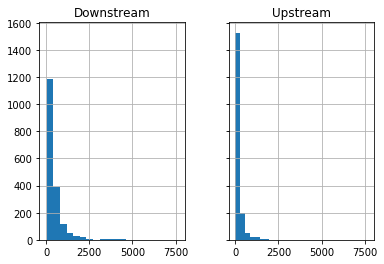

In [7]:
# We'll plot each histogram with 20 bins (default is 10;)
# and we will have both sites share the same scale for the x axis (discharge) and y axis (count)
Q.hist(bins=20, sharex=True, sharey=True)

# Kernel Density Plot
The Pandas dataframe also has a built-in KDE plotter, which for stream discharge is easier to interpret than a standard histogram.

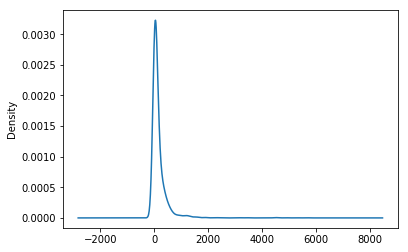

In [8]:
Q['Upstream'].plot.kde()

# Box plots

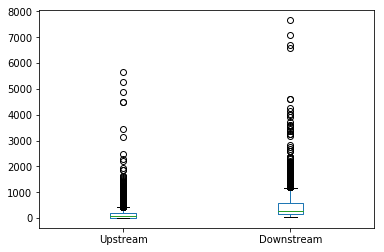

In [9]:
Q.plot.box()